<a href="https://colab.research.google.com/github/ymuto0302/PublicLecture2025/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 顧客セグメンテーション分析

In [ ]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## STEP 1: データの読み込みと確認
Kaggle から取得した "Mall Customer Segmentation Data" を読み込む。

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
# データの読み込み
# Mall Customer Segmentation Datasetを使用
df = pd.read_csv('Mall_Customers.csv')

print(f"データ件数: {df.shape[0]}")

# データの先頭5行を確認
df.head()

データ件数: 200


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print("\n=== 基本統計量の確認 ===")
df.describe()


=== 基本統計量の確認 ===


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:

print("\n=== 欠損値の確認 ===")
df.isnull().sum()


=== 欠損値の確認 ===


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


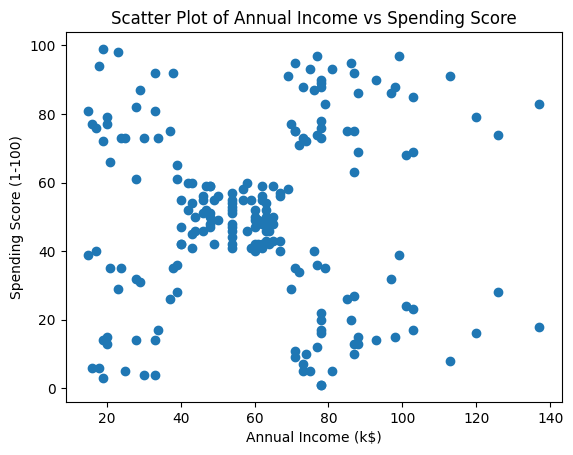

In [ ]:
# データ分布の可視化

# クラスタリング用の特徴量を選択: 年収と支出スコアを使用
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.show()

## STEP 2: データの前処理（標準化）

In [ ]:
# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n=== 標準化後のデータ統計 ===")
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.describe()


=== 標準化後のデータ統計 ===


,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


## k-means法によるクラスタリング

In [ ]:
# k=5でクラスタリング実行
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# 結果をデータフレームに追加
df['Cluster'] = cluster_labels

# クラスター別の件数
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(f"\n各クラスターの件数:")
for i, count in enumerate(cluster_counts):
    print(f"クラスター {i}: {count}件")


各クラスターの件数:
クラスター 0: 81件
クラスター 1: 39件
クラスター 2: 22件
クラスター 3: 35件
クラスター 4: 23件


## 結果の評価と解釈

In [ ]:
# クラスター別の統計情報
print("\n=== クラスター別統計情報 ===")
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std']
}).round(2)

print(cluster_summary)


=== クラスター別統計情報 ===
           Age        Annual Income (k$)        Spending Score (1-100)       
          mean    std               mean    std                   mean    std
Cluster                                                                      
0        42.72  16.45              55.30   8.99                  49.52   6.53
1        32.69   3.73              86.54  16.31                  82.13   9.36
2        25.27   5.26              25.73   7.57                  79.36  10.50
3        41.11  11.34              88.20  16.40                  17.11   9.95
4        45.22  13.23              26.30   7.89                  20.91  13.02


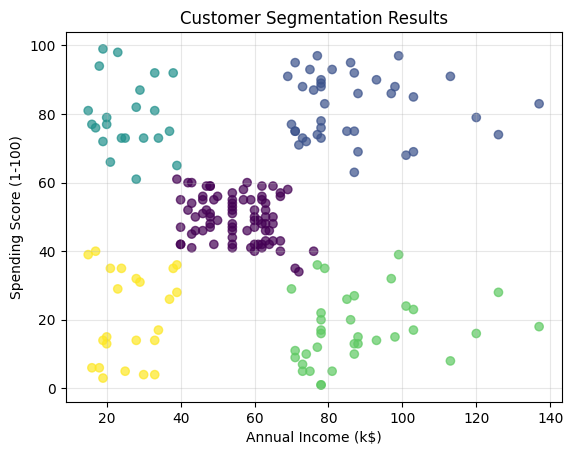

In [ ]:
# クラスタリング結果の散布図
plt.scatter(df['Annual Income (k$)'],  # X
            df['Spending Score (1-100)'], # Y
            c=df['Cluster'], # 色はクラスタ番号に従う
            alpha=0.7) # バブルの透明度

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation Results')
plt.grid(True, alpha=0.3)

In [ ]:

# 各セグメントの解釈

def interpret_clusters(df):
    """クラスターの特徴を分析してセグメント名を提案"""
    interpretations = {}

    for cluster in sorted(df['Cluster'].unique()):
        cluster_data = df[df['Cluster'] == cluster]

        avg_income = cluster_data['Annual Income (k$)'].mean()
        avg_spending = cluster_data['Spending Score (1-100)'].mean()
        avg_age = cluster_data['Age'].mean()

        # 特徴に基づく命名ロジック
        if avg_income < 50 and avg_spending < 50:
            name = "節約志向・低所得層"
        elif avg_income < 50 and avg_spending > 60:
            name = "消費志向・低所得層"
        elif avg_income > 70 and avg_spending < 40:
            name = "節約志向・高所得層"
        elif avg_income > 70 and avg_spending > 60:
            name = "消費志向・高所得層"
        else:
            name = "中間層"

        interpretations[cluster] = {
            'name': name,
            'avg_income': avg_income,
            'avg_spending': avg_spending,
            'avg_age': avg_age,
            'count': len(cluster_data)
        }

    return interpretations

print("\n=== セグメントの解釈 ===")
segments = interpret_clusters(df)

for cluster, info in segments.items():
    print(f"\nクラスタ {cluster}: {info['name']}")
    print(f"  平均年収: {info['avg_income']:.1f}kドル")
    print(f"  平均支出スコア: {info['avg_spending']:.1f}")
    print(f"  平均年齢: {info['avg_age']:.1f}歳")
    print(f"  顧客数: {info['count']}人")


=== セグメントの解釈 ===

クラスタ 0: 中間層
  平均年収: 55.3kドル
  平均支出スコア: 49.5
  平均年齢: 42.7歳
  顧客数: 81人

クラスタ 1: 消費志向・高所得層
  平均年収: 86.5kドル
  平均支出スコア: 82.1
  平均年齢: 32.7歳
  顧客数: 39人

クラスタ 2: 消費志向・低所得層
  平均年収: 25.7kドル
  平均支出スコア: 79.4
  平均年齢: 25.3歳
  顧客数: 22人

クラスタ 3: 節約志向・高所得層
  平均年収: 88.2kドル
  平均支出スコア: 17.1
  平均年齢: 41.1歳
  顧客数: 35人

クラスタ 4: 節約志向・低所得層
  平均年収: 26.3kドル
  平均支出スコア: 20.9
  平均年齢: 45.2歳
  顧客数: 23人


---
## (参考) エルボー法を用いた最適クラスタ数の探索
上記では見た目の判断からクラスタ数を 5 に設定したが，これを探索する方法がある。以下はエルボー法とシルエット分析を用いて最適クラスタ数を決定している。

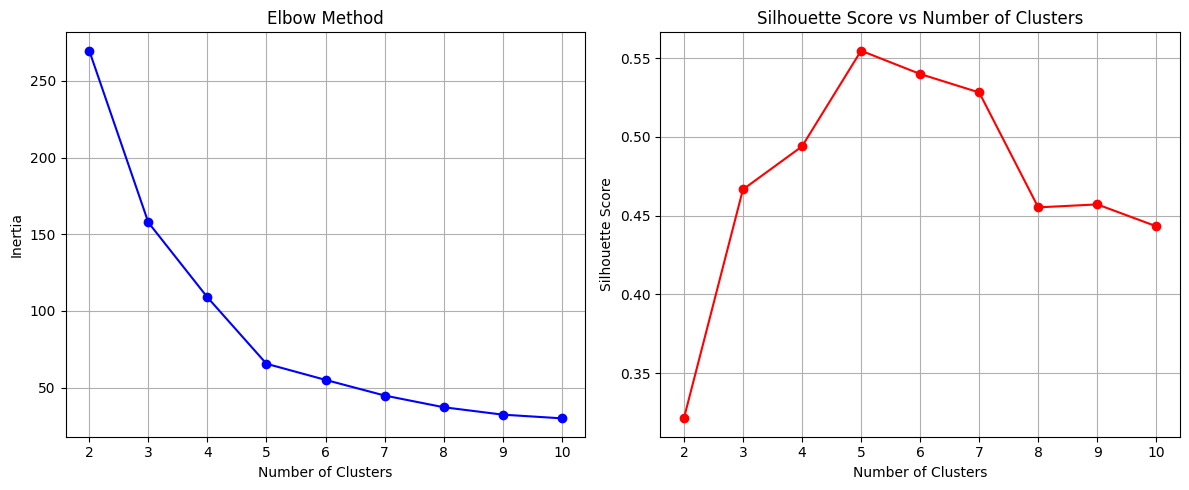

シルエット分析による最適クラスタ数: 5


In [ ]:
from sklearn.metrics import silhouette_score

# 最適なクラスター数の決定

# エルボー法 ＆ シルエット分析
inertias = []
silhouette_scores = []
k_range = range(2, 11) # クラスタ数の候補値を 2〜10 とする

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# 結果の可視化
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)

plt.tight_layout()
plt.show()

# 最適なクラスター数を出力
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"シルエット分析による最適クラスタ数: {best_k_silhouette}")